In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\A2010578\OneDrive\Github\EBA-3500\solutions':
  os.chdir(r'C:\Users\A2010578\OneDrive\Github\EBA-3500\solutions')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\A2010578\AppData\Local\Temp\ipykernel_20072\1789965837.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\A2010578\\AppData\\Local\\Programs\\Pyth

In [2]:
import numpy as np
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

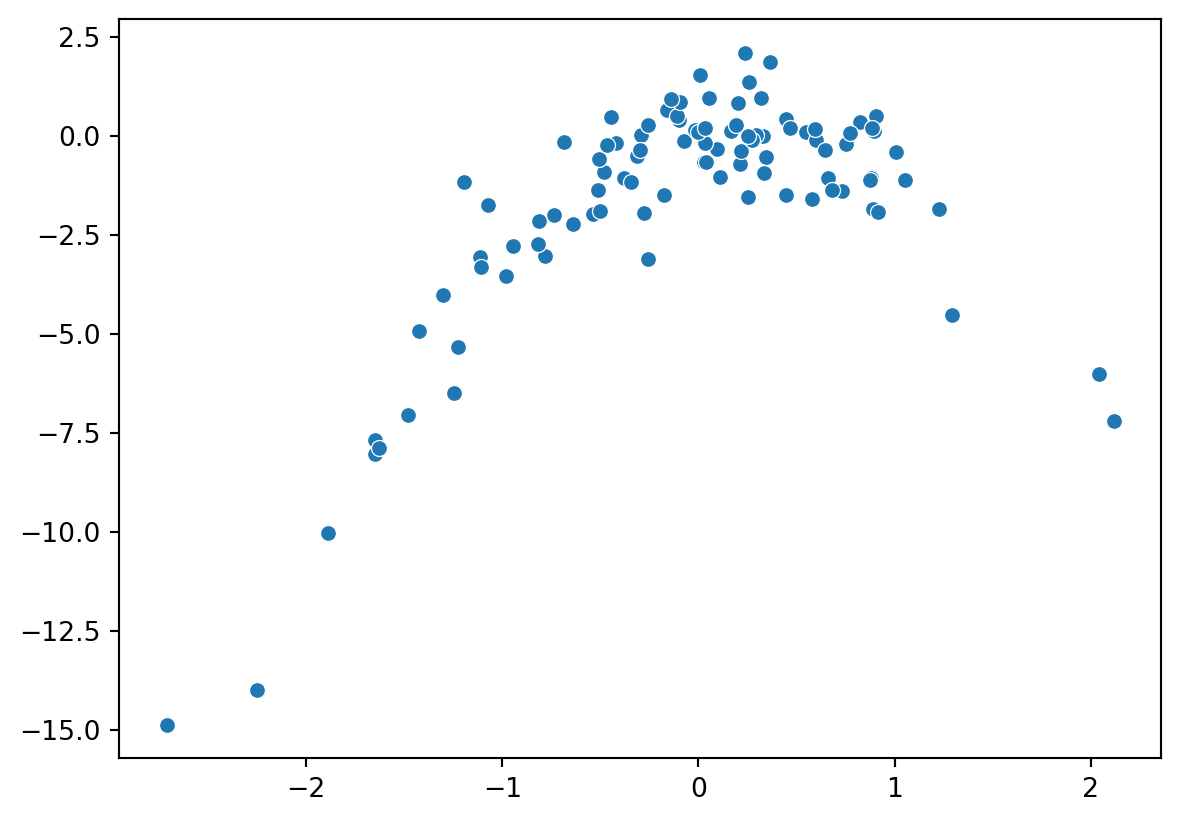

In [3]:
import seaborn as sns
import matplotlib.pylab as plt
sns.scatterplot(x=x, y=y)
plt.show()

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

In [5]:
def loocv(X, y, fitter):
  """Calculate the loocv for covariates x, responses y, and a fitter."""
  cv = LeaveOneOut()
  loo = cross_validate(fitter, X, y, cv = cv, scoring = "neg_mean_squared_error")
  return -loo["test_score"].mean()

In [6]:
import pandas as pd
fitter = LinearRegression()
X = pd.DataFrame({"x":x})
out = dict()

out["x"] = loocv(X,y,fitter)

X["x^2"] = x**2
out["x^2"] = loocv(X,y,fitter)

X["x^3"] = x**3
out["x^3"] = loocv(X,y,fitter)

X["x^4"] = x**4
out["x^4"] = loocv(X,y,fitter)
out

{'x': 6.633029839181983,
 'x^2': 1.1229368563419675,
 'x^3': 1.301796548935887,
 'x^4': 1.3323942694179352}

In [7]:
import statsmodels.formula.api as smf
data = pd.DataFrame({"x":x,"y":y})
print(round(smf.ols("y~x",data=data).fit().pvalues, 3))
print(round(smf.ols("y~x+I(x**2)",data=data).fit().pvalues, 3))
print(round(smf.ols("y~x+I(x**2)+I(x**3)",data=data).fit().pvalues, 3))
print(round(smf.ols("y~x+I(x**2)+I(x**3)+I(x**4)",data=data).fit().pvalues, 3))

Intercept    0.0
x            0.0
dtype: float64
Intercept    0.543
x            0.000
I(x ** 2)    0.000
dtype: float64
Intercept    0.635
x            0.000
I(x ** 2)    0.000
I(x ** 3)    0.287
dtype: float64
Intercept    0.460
x            0.000
I(x ** 2)    0.000
I(x ** 3)    0.642
I(x ** 4)    0.023
dtype: float64
